In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
import geopandas as gpd
import datetime

In [2]:
data2019 = pd.read_csv("2019_numbat_melted.csv")
data2019.sample(3)

,Unnamed: 0,Mode,Station,Zone,Year,Day,Total,Line,Longitude,Latitude,Hour_zone,hour_count
4686,4686,LU,Liverpool Street,1,2019,SAT,139891,"Metropolitan, Central, Circle, Hammersmith & City",-0.081601,51.516842,3,54431
6549,6549,LU,Parsons Green,2,2019,MTT,22457,District,-0.200167,51.474472,4,6082
3935,3935,LO,Queen's Park,2,2019,SUN,4426,Bakerloo,-0.204143,51.533472,3,2037


In [46]:
data2019['Station'].unique()

array(['Canary Wharf', 'Canning Town', 'Shadwell', 'Stratford',
       'West Ham', 'Acton Central', 'Anerley', 'Barking',
       'Blackhorse Road', 'Brockley', 'Brondesbury', 'Brondesbury Park',
       'Bruce Grove', 'Bush Hill Park', 'Bushey',
       'Caledonian Road & Barnsbury', 'Cambridge Heath', 'Camden Road',
       'Canada Water', 'Canonbury', 'Carpenders Park', 'Cheshunt',
       'Chingford', 'Clapham High Street', 'Clapham Junction', 'Clapton',
       'Crouch Hill', 'Crystal Palace', 'Dalston Junction',
       'Dalston Kingsland', 'Denmark Hill', 'Emerson Park',
       'Enfield Town', 'Finchley Road & Frognal', 'Forest Hill',
       'Gospel Oak', 'Gunnersbury', 'Hackney Central', 'Hackney Downs',
       'Hackney Wick', 'Haggerston', 'Hampstead Heath', 'Harlesden',
       'Harringay Green Lanes', 'Harrow & Wealdstone', 'Hatch End',
       'Headstone Lane', 'Highams Park', 'Highbury & Islington',
       'Homerton', 'Honor Oak Park', 'Hoxton', 'Imperial Wharf',
       'Kensal Gre

In [3]:
data2020 = pd.read_csv("2020_station_tap.csv")
data2020.sample(3)

,Mode,Station,Year,Day,Tap_count,Lines,Zone,Longitude,Latitude
335,LU,Colindale,2020,SUN,5374,Northern,4,-0.248342,51.594947
296,LU,Chiswick Park,2020,FRI,3125,District,3,-0.266982,51.494158
56,LU,Balham,2020,FRI,16779,Northern,3,-0.151090,51.443110


In [47]:
data2020['Station'].unique()

array(['Canary Wharf', 'Shadwell', 'Acton Central', 'Acton Town',
       'Aldgate', 'Aldgate East', 'Alperton', 'Amersham', 'Anerley',
       'Angel', 'Archway', 'Arnos Grove', 'Arsenal', 'Baker Street',
       'Balham', 'Bank', 'Barbican', 'Barking', 'Barkingside',
       'Barons Court', 'Bayswater', 'Becontree', 'Belsize Park',
       'Bermondsey', 'Bethnal Green', 'Blackfriars', 'Blackhorse Road',
       'Bond Street', 'Borough', 'Boston Manor', 'Bounds Green',
       'Bow Road', 'Brent Cross', 'Brentwood', 'Brixton', 'Brockley',
       'Brondesbury', 'Brondesbury Park', 'Bruce Grove', 'Buckhurst Hill',
       'Burnt Oak', 'Bush Hill Park', 'Bushey', 'Caledonian Road',
       'Caledonian Road & Barnsbury', 'Cambridge Heath', 'Camden Road',
       'Camden Town', 'Canada Water', 'Canning Town', 'Cannon Street',
       'Canonbury', 'Canons Park', 'Carpenders Park', 'Chadwell Heath',
       'Chalfont & Latimer', 'Chalk Farm', 'Chancery Lane',
       'Charing Cross', 'Chesham', 'Cheshunt

In [4]:
merger = data2019[['Mode','Station','Day','Total']]
merger = merger.rename(columns={'Total':'Count2019'})
merger

,Mode,Station,Day,Count2019
0,DLR,Canary Wharf,FRI,56511
1,DLR,Canary Wharf,MTT,62314
2,DLR,Canary Wharf,SAT,30221
3,DLR,Canary Wharf,SUN,26237
4,LU,Canary Wharf,FRI,159240
...,...,...,...,...
10387,TfLRail,Seven Kings,SUN,4869
10388,TfLRail,Shenfield,FRI,6351
10389,TfLRail,Shenfield,MTT,6239
10390,TfLRail,Shenfield,SAT,4909


In [5]:
merged = pd.merge(merger, data2020, how='inner', left_on = ['Mode','Station','Day'], right_on = ['Mode','Station','Day'])
merged

,Mode,Station,Day,Count2019,Year,Tap_count,Lines,Zone,Longitude,Latitude
0,DLR,Canary Wharf,FRI,56511,2020,4195,Jubilee,2,-0.016135,51.502917
1,DLR,Canary Wharf,FRI,56511,2020,4195,Jubilee,2,-0.016135,51.502917
2,DLR,Canary Wharf,FRI,56511,2020,4195,Jubilee,2,-0.016135,51.502917
3,DLR,Canary Wharf,FRI,56511,2020,4195,Jubilee,2,-0.016135,51.502917
4,DLR,Canary Wharf,FRI,56511,2020,4195,Jubilee,2,-0.016135,51.502917
...,...,...,...,...,...,...,...,...,...,...
7891,LU,Woodside Park,SUN,6668,2020,1218,Northern,4,-0.183907,51.617590
7892,LU,Woodside Park,SUN,6668,2020,1218,Northern,4,-0.183907,51.617590
7893,LU,Woodside Park,SUN,6668,2020,1218,Northern,4,-0.183907,51.617590
7894,LU,Woodside Park,SUN,6668,2020,1218,Northern,4,-0.183907,51.617590


In [6]:
merged = merged.drop_duplicates()
merged

,Mode,Station,Day,Count2019,Year,Tap_count,Lines,Zone,Longitude,Latitude
0,DLR,Canary Wharf,FRI,56511,2020,4195,Jubilee,2,-0.016135,51.502917
6,DLR,Canary Wharf,MTT,62314,2020,4527,Jubilee,2,-0.016135,51.502917
12,DLR,Canary Wharf,SAT,30221,2020,2361,Jubilee,2,-0.016135,51.502917
18,DLR,Canary Wharf,SUN,26237,2020,1566,Jubilee,2,-0.016135,51.502917
24,LU,Canning Town,FRI,48919,2020,23649,Jubilee,3,0.009569,51.513610
...,...,...,...,...,...,...,...,...,...,...
7866,LU,Woodford,SUN,8939,2020,3333,Central,4,0.035641,51.606360
7872,LU,Woodside Park,FRI,14426,2020,2930,Northern,4,-0.183907,51.617590
7878,LU,Woodside Park,MTT,14666,2020,2898,Northern,4,-0.183907,51.617590
7884,LU,Woodside Park,SAT,8881,2020,1821,Northern,4,-0.183907,51.617590


In [7]:
a= merged['Count2019']
b= merged['Tap_count']
merged['change'] = ((b-a) / a)*100

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
merged

,Mode,Station,Day,Count2019,Year,Tap_count,Lines,Zone,Longitude,Latitude,change
0,DLR,Canary Wharf,FRI,56511,2020,4195,Jubilee,2,-0.016135,51.502917,-92.576666
6,DLR,Canary Wharf,MTT,62314,2020,4527,Jubilee,2,-0.016135,51.502917,-92.735180
12,DLR,Canary Wharf,SAT,30221,2020,2361,Jubilee,2,-0.016135,51.502917,-92.187552
18,DLR,Canary Wharf,SUN,26237,2020,1566,Jubilee,2,-0.016135,51.502917,-94.031330
24,LU,Canning Town,FRI,48919,2020,23649,Jubilee,3,0.009569,51.513610,-51.656820
...,...,...,...,...,...,...,...,...,...,...,...
7866,LU,Woodford,SUN,8939,2020,3333,Central,4,0.035641,51.606360,-62.713950
7872,LU,Woodside Park,FRI,14426,2020,2930,Northern,4,-0.183907,51.617590,-79.689450
7878,LU,Woodside Park,MTT,14666,2020,2898,Northern,4,-0.183907,51.617590,-80.240011
7884,LU,Woodside Park,SAT,8881,2020,1821,Northern,4,-0.183907,51.617590,-79.495552


In [21]:
merged['change'].describe()

count    1092.000000
mean      -60.539829
std         8.713128
min       -94.031330
25%       -64.328021
50%       -60.322430
75%       -55.794201
max       -25.198413
Name: change, dtype: float64

In [8]:
#need a abs value of change in order to be colored 
merged['abs_change'] = merged['change'].abs()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
merged

,Mode,Station,Day,Count2019,Year,Tap_count,Lines,Zone,Longitude,Latitude,change,abs_change
0,DLR,Canary Wharf,FRI,56511,2020,4195,Jubilee,2,-0.016135,51.502917,-92.576666,92.576666
6,DLR,Canary Wharf,MTT,62314,2020,4527,Jubilee,2,-0.016135,51.502917,-92.735180,92.735180
12,DLR,Canary Wharf,SAT,30221,2020,2361,Jubilee,2,-0.016135,51.502917,-92.187552,92.187552
18,DLR,Canary Wharf,SUN,26237,2020,1566,Jubilee,2,-0.016135,51.502917,-94.031330,94.031330
24,LU,Canning Town,FRI,48919,2020,23649,Jubilee,3,0.009569,51.513610,-51.656820,51.656820
...,...,...,...,...,...,...,...,...,...,...,...,...
7866,LU,Woodford,SUN,8939,2020,3333,Central,4,0.035641,51.606360,-62.713950,62.713950
7872,LU,Woodside Park,FRI,14426,2020,2930,Northern,4,-0.183907,51.617590,-79.689450,79.689450
7878,LU,Woodside Park,MTT,14666,2020,2898,Northern,4,-0.183907,51.617590,-80.240011,80.240011
7884,LU,Woodside Park,SAT,8881,2020,1821,Northern,4,-0.183907,51.617590,-79.495552,79.495552


In [11]:
merged.to_csv("changes.csv", index=False)

In [4]:
ch = pd.read_csv("changes.csv")

In [5]:
ch.sort_values(by='change').head(10)

,Mode,Station,Day,Count2019,Year,Tap_count,Lines,Zone,Longitude,Latitude,change,abs_change
3,DLR,Canary Wharf,SUN,26237,2020,1566,Jubilee,2,-0.016135,51.502917,-94.031330,94.031330
1,DLR,Canary Wharf,MTT,62314,2020,4527,Jubilee,2,-0.016135,51.502917,-92.735180,92.735180
0,DLR,Canary Wharf,FRI,56511,2020,4195,Jubilee,2,-0.016135,51.502917,-92.576666,92.576666
2,DLR,Canary Wharf,SAT,30221,2020,2361,Jubilee,2,-0.016135,51.502917,-92.187552,92.187552
848,LU,Roding Valley,FRI,1832,2020,203,Central,4,0.045340,51.616578,-88.919214,88.919214
355,LU,Chorleywood,SUN,1941,2020,221,Metropolitan,7,-0.516985,51.653807,-88.614116,88.614116
849,LU,Roding Valley,MTT,1677,2020,202,Central,4,0.045340,51.616578,-87.954681,87.954681
11,DLR,Shadwell,SUN,15189,2020,1882,NaN,2,-0.055366,51.510700,-87.609454,87.609454
10,DLR,Shadwell,SAT,20824,2020,2655,NaN,2,-0.055366,51.510700,-87.250288,87.250288
8,DLR,Shadwell,FRI,28899,2020,3805,NaN,2,-0.055366,51.510700,-86.833454,86.833454


In [42]:
merged['abs_change'].describe()

count    1092.000000
mean       60.539829
std         8.713128
min        25.198413
25%        55.794201
50%        60.322430
75%        64.328021
max        94.031330
Name: abs_change, dtype: float64

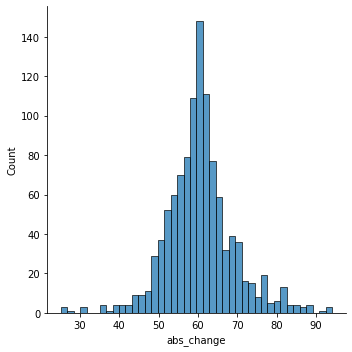

In [43]:
ax = sns.displot( data=merged, x= 'abs_change')

In [40]:
gdf = geopandas.GeoDataFrame(
    merged, geometry=geopandas.points_from_xy(merged.Longitude, merged.Latitude), crs="EPSG:4326")

In [41]:
gdf.to_file("changes.geojson", driver='GeoJSON')

In [34]:
tfl_line = gpd.read_file('Tfl_lines/TfL_lines_update.shp')

<AxesSubplot:>

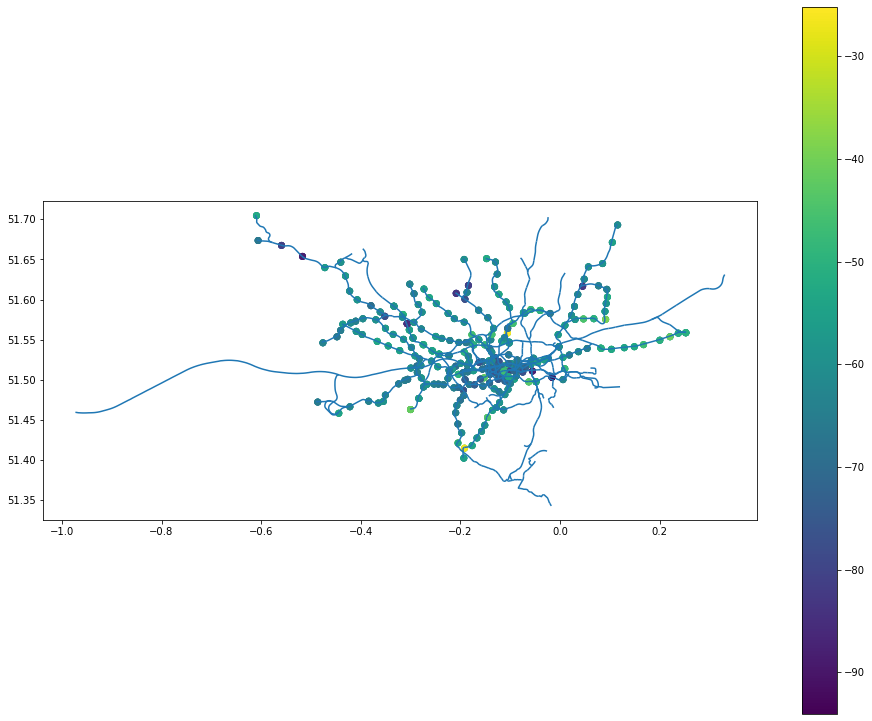

In [36]:
fig,ax = plt.subplots(figsize=(16,13))
tfl_line.plot(ax=ax)
gdf.plot(column='change', legend=True, ax=ax)